In [1]:
#Decision Tree Implementation
import collections

# open the data file
data = open("nursery_dtree.txt", "r")
# Reading line by line with readlines
data1 = data.readlines()
# List to store data
dataToTrain = []
# split string and convert into list of strings
for x in data1:
    data2 = x.split(",")
    if data2[3] == "more":
        data2[3] = "100"
    # appending list after splitting into dataToTrain
    dataToTrain.append(data2)

# testing data
dataForTesting = dataToTrain[0:2000]

# Training data
dataToTrain = dataToTrain[2000:]

# columns in the data set
header = ["parents", "has_nurs", "form", "children", "housing", "finance", "social", "health", "class"]


# number of each class examples in lines
def eachTypeNumbers(lines):
    # here we are keeping track of numbers for each class
    dicForNumber = {}
    # Going through every training example
    for line in lines:
        # this is getting label of the example
        label = line[-1]
        # if it is inserting first time
        if label not in dicForNumber:
            dicForNumber[label] = 0
        # if it is already present
        dicForNumber[label] += 1
    return dicForNumber


class CompareValue:
    def __init__(self, feature, evaluate):
        self.feature = feature
        self.evaluate = evaluate

    def compare(self, valueToCompare):
        tmp = valueToCompare[self.feature]
        tmp1 = (tmp == self.evaluate)
        return tmp1


def separate(tuples, query):
    accepted_tuples = []
    rejected_tuples = []
    for tuple1 in tuples:
        if not query.compare(tuple1):
            rejected_tuples.append(tuple1)
        else:
            accepted_tuples.append(tuple1)
    return accepted_tuples, rejected_tuples


def calculate_gini_index(tuples):
    impr = 1
    tmp = eachTypeNumbers(tuples)
    for attr in tmp:
        probability = tmp[attr] / float(len(tuples))
        impr = impr - (probability ** 2)
    return impr


def calculate_gain(left_tuples, right_tuples, prsnt_uncrtn):
    p = float(len(left_tuples)) / (len(left_tuples) + len(right_tuples))
    return prsnt_uncrtn - p * calculate_gini_index(left_tuples) - (1 - p) * calculate_gini_index(right_tuples)


def calculate_best_separation(tuples):
    better_evaluate = None
    gain_more = 0
    uncrtn_prsnt = calculate_gini_index(tuples)
    dicValuesCanBe = {
        0: ["usual", "pretentious", "great_pret"],
        1: ["proper", "less_proper", "improper", "critical", "very_crit"],
        2: ["complete", "completed", "incomplete", "foster"],
        3: ["1", "2", "3", "100"],
        4: ["convenient", "less_conv", "critical"],
        5: ["convenient", "inconv"],
        6: ["non-prob", "slightly_prob", "problematic"],
        7: ["recommended", "priority", "not_recom"],
        8: ["priority", "not_recom", "recommend", "very_recom", "spec_prior"]
    }
    for attr in range(8):
        appraises = dicValuesCanBe[attr]
        for appraise in appraises:
            evaluate = CompareValue(attr, appraise)
            accepted_tuples, rejected_tuples = separate(tuples, evaluate)
            if len(rejected_tuples) == 0 or len(accepted_tuples) == 0:
                continue
            new_gain = calculate_gain(accepted_tuples, rejected_tuples, uncrtn_prsnt)
            if new_gain >= gain_more:
                gain_more, better_evaluate = new_gain, evaluate
    return gain_more, better_evaluate


class Leaf_Node:
    def __init__(self, tuples):
        self.distribution = eachTypeNumbers(tuples)


class Inner_Decision_Node:
    def __init__(self, evaluate, branch_accepted, branch_rejected):
        self.branch_accepted = branch_accepted
        self.evaluate = evaluate
        self.branch_rejected = branch_rejected


def generate_decision_tree(tuples):
    info_gain, evaluate = calculate_best_separation(tuples)
    if info_gain == 0:
        return Leaf_Node(tuples)
    true_rows, false_rows = separate(tuples, evaluate)
    true_branch = generate_decision_tree(true_rows)
    false_branch = generate_decision_tree(false_rows)
    return Inner_Decision_Node(evaluate, true_branch, false_branch)


generated_tree = generate_decision_tree(dataToTrain)


def apply_classification(tuple1, node):
    if isinstance(node, Leaf_Node):
        return node.distribution
    if node.evaluate.compare(tuple1):
        return apply_classification(tuple1, node.branch_accepted)
    else:
        return apply_classification(tuple1, node.branch_rejected)


def generate_result(distribution):
    prob_dict = {}
    mysum = sum(distribution.values()) * 1.0
    for attr in distribution.keys():
        prob = int(distribution[attr] / mysum * 100)
        prob_dict[attr] = str(prob) + "%"
    return prob_dict


count = 0

for tuple in dataForTesting:
    tmp_dic = generate_result(apply_classification(tuple, generated_tree))
    op_dic = collections.OrderedDict(sorted(tmp_dic.items(), key=lambda y: y[1], reverse=True))
    print("True value: ", tuple[-1].strip())
    print("Predicted value: ", list(op_dic.keys())[0].strip())
    if list(op_dic.keys())[0].strip() == tuple[-1].strip():
        count = count + 1
    print("")

print("No. of training inputs: ", len(dataToTrain))
print("No. of testing inputs: ", len(dataForTesting))
print("Accuracy: %.3f%%" % (count / len(dataForTesting) * 100))


True value:  priority
Predicted value:  priority

True value:  not_recom
Predicted value:  not_recom

True value:  priority
Predicted value:  priority

True value:  not_recom
Predicted value:  not_recom

True value:  priority
Predicted value:  priority

True value:  priority
Predicted value:  priority

True value:  not_recom
Predicted value:  not_recom

True value:  very_recom
Predicted value:  very_recom

True value:  priority
Predicted value:  priority

True value:  not_recom
Predicted value:  not_recom

True value:  very_recom
Predicted value:  very_recom

True value:  priority
Predicted value:  priority

True value:  not_recom
Predicted value:  not_recom

True value:  priority
Predicted value:  priority

True value:  priority
Predicted value:  priority

True value:  not_recom
Predicted value:  not_recom

True value:  very_recom
Predicted value:  very_recom

True value:  priority
Predicted value:  priority

True value:  not_recom
Predicted value:  not_recom

True value:  very_recom


In [2]:
#Random Forest Implementation
import random

# open the data file
data = open("nursery_dtree.txt", "r")
# Reading line by line with readlines
data1 = data.readlines()
# List to store data
dataToTrain = []
# split string and convert into list of strings
for x in data1:
    data2 = x.split(",")
    if data2[3] == "more":
        data2[3] = "100"
    # appending list after splitting into dataToTrain
    dataToTrain.append(data2)

start = 0
end = 10

# testing data
dataForTesting = dataToTrain[start:end]

# Training data
dataToTrain = dataToTrain[end:]

available_index = []

for i in range(0, 12960 - end):
    available_index.append(i)


def subsample(dataToTrain, ratio):
    sample1 = []
    included_index = available_index.copy()
    n_sample = round(len(dataToTrain) * ratio)
    while len(sample1) < n_sample:
        selected = random.choice(included_index)
        sample1.append(dataToTrain[selected])
        included_index.remove(selected)
    return sample1


# columns in the data set
header = ["parents", "has_nurs", "form", "children", "housing", "finance", "social", "health", "class"]


# number of each class examples in lines
def eachTypeNumbers(lines):
    # here we are keeping track of numbers for each class
    dicForNumber = {}
    # Going through every training example
    for line in lines:
        # this is getting label of the example
        label = line[-1]
        # if it is inserting first time
        if label not in dicForNumber:
            dicForNumber[label] = 0
        # if it is already present
        dicForNumber[label] += 1
    return dicForNumber


class CompareValue:
    def __init__(self, feature, evaluate):
        self.feature = feature
        self.evaluate = evaluate

    def compare(self, valueToCompare):
        tmp = valueToCompare[self.feature]
        tmp1 = (tmp == self.evaluate)
        return tmp1


def separate(tuples, query):
    accepted_tuples = []
    rejected_tuples = []
    for tuple1 in tuples:
        if not query.compare(tuple1):
            rejected_tuples.append(tuple1)
        else:
            accepted_tuples.append(tuple1)
    return accepted_tuples, rejected_tuples


def calculate_gini_index(tuples):
    impr = 1
    tmp = eachTypeNumbers(tuples)
    for attr in tmp:
        probability = tmp[attr] / float(len(tuples))
        impr = impr - (probability ** 2)
    return impr


def calculate_gain(left_tuples, right_tuples, prsnt_uncrtn):
    p = float(len(left_tuples)) / (len(left_tuples) + len(right_tuples))
    return prsnt_uncrtn - p * calculate_gini_index(left_tuples) - (1 - p) * calculate_gini_index(right_tuples)


def calculate_best_separation(tuples):
    better_evaluate = None
    gain_more = 0
    uncrtn_prsnt = calculate_gini_index(tuples)
    dicValuesCanBe = {
        0: ["usual", "pretentious", "great_pret"],
        1: ["proper", "less_proper", "improper", "critical", "very_crit"],
        2: ["complete", "completed", "incomplete", "foster"],
        3: ["1", "2", "3", "100"],
        4: ["convenient", "less_conv", "critical"],
        5: ["convenient", "inconv"],
        6: ["non-prob", "slightly_prob", "problematic"],
        7: ["recommended", "priority", "not_recom"],
        8: ["priority", "not_recom", "recommend", "very_recom", "spec_prior"]
    }
    n_features = 4
    features = []
    while len(features) < n_features:
        index = random.randrange(8)
        if index not in features:
            features.append(index)
    for attr in features:
        appraises = dicValuesCanBe[attr]
        for appraise in appraises:
            evaluate = CompareValue(attr, appraise)
            accepted_tuples, rejected_tuples = separate(tuples, evaluate)
            if len(rejected_tuples) == 0 or len(accepted_tuples) == 0:
                continue
            new_gain = calculate_gain(accepted_tuples, rejected_tuples, uncrtn_prsnt)
            if new_gain >= gain_more:
                gain_more, better_evaluate = new_gain, evaluate
    return gain_more, better_evaluate


class Leaf_Node:
    def __init__(self, tuples):
        self.distribution = eachTypeNumbers(tuples)


class Inner_Decision_Node:
    def __init__(self, evaluate, branch_accepted, branch_rejected):
        self.branch_accepted = branch_accepted
        self.evaluate = evaluate
        self.branch_rejected = branch_rejected


def generate_decision_tree(tuples):
    info_gain, evaluate = calculate_best_separation(tuples)
    if info_gain == 0:
        return Leaf_Node(tuples)
    true_rows, false_rows = separate(tuples, evaluate)
    true_branch = generate_decision_tree(true_rows)
    false_branch = generate_decision_tree(false_rows)
    return Inner_Decision_Node(evaluate, true_branch, false_branch)


num_trees = 5
my_count = 0

for tuple_1 in dataForTesting:
    dic = {}
    for i in range(num_trees):
        sample = subsample(dataToTrain, 0.9)
        generated_tree = generate_decision_tree(sample)


        def apply_classification(tuple1, node):
            if isinstance(node, Leaf_Node):
                return node.distribution
            if node.evaluate.compare(tuple1):
                return apply_classification(tuple1, node.branch_accepted)
            else:
                return apply_classification(tuple1, node.branch_rejected)


        def generate_result(distribution):
            prob_dict = {}
            mysum = sum(distribution.values()) * 1.0
            for attr in distribution.keys():
                prob = int(distribution[attr] / mysum * 100)
                prob_dict[attr.rstrip()] = str(prob) + "%"
            return prob_dict


        # for tuple2 in dataForTesting:
        x = generate_result(apply_classification(tuple_1, generated_tree))
        ke = list(x.items())
        if ke[0] not in dic:
            dic[ke[0]] = 0
        dic[ke[0]] += 1

    my_dic = {}
    for key, val in dic.items():
        if key[0] in my_dic:
            my_dic[key[0]] += val
        else:
            my_dic[key[0]] = val
    my_list = sorted(my_dic.items(), key=lambda y: y[1], reverse=True)
    if tuple_1[-1].rstrip() == my_list[0][0]:
        my_count = my_count + 1
    print("True value: ", tuple_1[-1].rstrip())
    print("Predicted value: ", my_list, "\n")

print("No. of training inputs: ", len(dataToTrain))
print("No. of testing inputs: ", len(dataForTesting))
print("Accuracy: %.3f%%" % (my_count / len(dataForTesting) * 100))


True value:  priority
Predicted value:  [('priority', 5)] 

True value:  not_recom
Predicted value:  [('not_recom', 5)] 

True value:  priority
Predicted value:  [('priority', 5)] 

True value:  not_recom
Predicted value:  [('not_recom', 5)] 

True value:  priority
Predicted value:  [('priority', 5)] 

True value:  priority
Predicted value:  [('priority', 5)] 

True value:  not_recom
Predicted value:  [('not_recom', 5)] 

True value:  very_recom
Predicted value:  [('very_recom', 5)] 

True value:  priority
Predicted value:  [('priority', 5)] 

True value:  not_recom
Predicted value:  [('not_recom', 5)] 

No. of training inputs:  12950
No. of testing inputs:  10
Accuracy: 100.000%


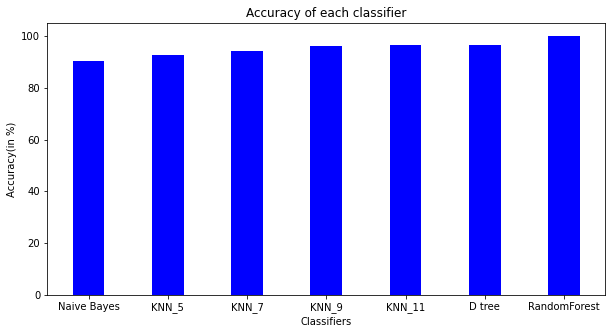

In [41]:
import numpy as np
import matplotlib.pyplot as plt
 
# creating the dataset
data = {'Naive Bayes':90.47, 'KNN_5':92.51, 'KNN_7':94.09,'KNN_9':96.29,'KNN_11':96.64,'D tree':96.40,'RandomForest':100.00}
classifiers = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(classifiers, values, color ='Blue',
        width = 0.4)
 
plt.xlabel("Classifiers")
plt.ylabel("Accuracy(in %)")
plt.title("Accuracy of each classifier")
plt.show()

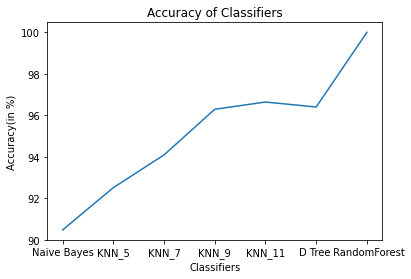

In [42]:

import matplotlib.pyplot as plt
 
lab=['Naive Bayes', 'KNN_5', 'KNN_7','KNN_9','KNN_11','D Tree ',' RandomForest']
Accuracy=[90.47,92.51,94.09,96.29,96.64,96.40,100.00]
plt.plot(lab, Accuracy)
 
plt.xlabel('Classifiers')
plt.ylabel('Accuracy(in %)')
 
plt.title('Accuracy of Classifiers')
plt.show()